# PRCP-1004

# Fifa20 Fifa 20

##### Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [61]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter('ignore')

In [2]:
rand_state = 10
n_iterations = 5

In [3]:
# Load the data
fifa_data= pd.read_csv('../../Data/players_20.csv')

In [4]:
fifa_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# EDA

###### Getting the overview of the Dataset

In [5]:
print("Shape :",fifa_data.shape)
print("Rows : ",fifa_data.shape[0])
print("Columns : ",fifa_data.shape[1])
print("\nFeatures : \n" ,fifa_data.columns.tolist())
print("\n Missing Values : ",fifa_data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,fifa_data.nunique(dropna=False))

Shape : (18278, 104)
Rows :  18278
Columns :  104

Features : 
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'move

In [6]:
#For Fifa data you need to use clustering algorithms to categorize similar players using their traits and their different skills in the field.

In [7]:
#ProfileReport(fifa_data)

In [8]:
#prof = ProfileReport(fifa_data)
#prof.to_file(output_file='output.html')

In [9]:
fifa_reqd_data = fifa_data.loc[:, [#'sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 
                                   'age', 'height_cm', 'weight_kg', 'nationality', 
                                   'club', 'overall', 'potential', 'value_eur', 'wage_eur', 
                                   'player_positions', 'preferred_foot', 'international_reputation', 
                                   'weak_foot', 'skill_moves', 'work_rate', 'body_type', 
                                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 
                                   'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 
                                   'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 
                                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 
                                   'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 
                                   'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                                   'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
                                   'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
                                   'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
                                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
                                   'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                                   'mentality_penalties', 'mentality_composure', 'defending_marking', 
                                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
                                   'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                                   'goalkeeping_reflexes'#, 
                                   #'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 
                                   #'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 
                                   #'cb', 'rcb', 'rb'
                                  ]
                              ]

In [10]:
fifa_reqd_data

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,...,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,...,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,...,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,...,36,40,39,44,54,14,9,13,13,13


###### Grouping the Data into Categorical and Continuous Variable

In [11]:
#Grouping the Data into Categorical and Continuous Variable
""" 
'player_url', 'short_name', 'long_name', 'dob', , 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
             'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
             'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'
""" 
Catvar_list=['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type',
             'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
             'nation_position', 'player_traits']

# 'sofifa_id', 
Convar_list=['age', 'height_cm', 'weight_kg', 'overall', 'potential',
             'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
             'skill_moves', 'release_clause_eur', 'team_jersey_number',
             'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
             'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
             'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
             'gk_positioning', 'attacking_crossing', 'attacking_finishing',
             'attacking_heading_accuracy', 'attacking_short_passing',
             'attacking_volleys', 'skill_dribbling', 'skill_curve',
             'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
             'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
             'movement_reactions', 'movement_balance', 'power_shot_power',
             'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
             'mentality_aggression', 'mentality_interceptions',
             'mentality_positioning', 'mentality_vision', 'mentality_penalties',
             'mentality_composure', 'defending_marking', 'defending_standing_tackle',
             'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 
             'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [12]:
for cat in Catvar_list:
    print('\nUnique values of Project_Data.'+cat+':: \n',fifa_reqd_data[cat].value_counts(dropna = False))


Unique values of Project_Data.nationality:: 
 England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
               ... 
Puerto Rico       1
South Sudan       1
Eritrea           1
Vietnam           1
Gibraltar         1
Name: nationality, Length: 162, dtype: int64

Unique values of Project_Data.club:: 
 Bournemouth                   33
West Ham United               33
Watford                       33
Fortuna Düsseldorf            33
CD Leganés                    33
                              ..
Colombia                       1
Austria                        1
Turkey                         1
Poland                         1
US Orléans Loiret Football     1
Name: club, Length: 698, dtype: int64

Unique values of Project_Data.player_positions:: 
 CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
CM, CDM, RWB       1
LB, RW, LW         1
RM, RB, CM         1
RM, RW

In [39]:
for column in fifa_reqd_data.columns[fifa_reqd_data.isnull().any()]:
    print(column,"\t",fifa_reqd_data[column].isnull().sum())

release_clause_eur 	 1298
team_position 	 240
team_jersey_number 	 240
contract_valid_until 	 240
pace 	 2036
shooting 	 2036
passing 	 2036
dribbling 	 2036
defending 	 2036
physic 	 2036


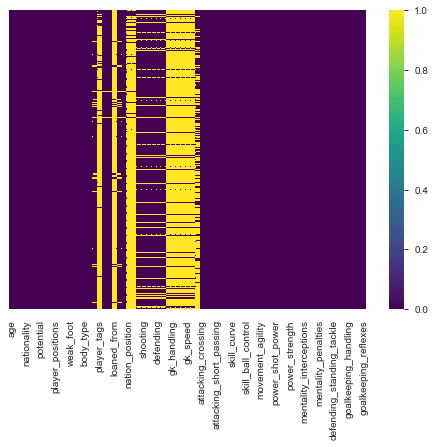

In [14]:
sns.set_style('whitegrid')
sns.heatmap(fifa_reqd_data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [30]:
fifa_reqd_data_new = fifa_reqd_data.drop(columns=['player_tags', 'loaned_from', 'nation_position'
                                                  , 'nation_jersey_number', 'gk_diving', 'gk_handling'
                                                  , 'gk_kicking', 'gk_reflexes', 'gk_speed'
                                                  , 'gk_positioning', 'player_traits', 'joined'], axis=1)

In [41]:
# Following are missing for Goalkeepers. Defaulting to 0
# pace, shooting, passing, dribbling, defending, physic

columns_missing_gk = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

fifa_reqd_data_new[columns_missing_gk] = fifa_reqd_data_new[columns_missing_gk].fillna(0)
    
columns_missing = ['team_position', 'team_jersey_number', 'contract_valid_until']

fifa_reqd_data_new[columns_missing] = fifa_reqd_data_new[columns_missing].fillna(0)

columns_release = ['release_clause_eur']

fifa_reqd_data_new[columns_release] = fifa_reqd_data_new[columns_release].fillna(fifa_reqd_data_new[columns_release].median())

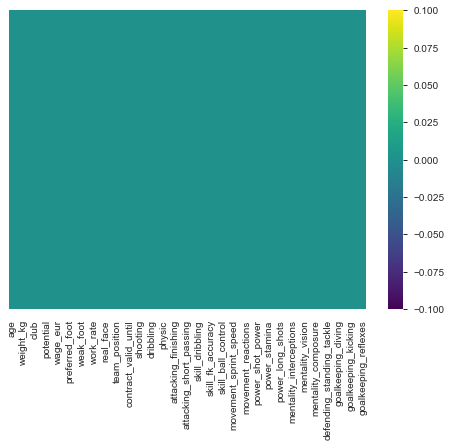

In [42]:
sns.set_style('whitegrid')
sns.heatmap(fifa_reqd_data_new.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [43]:
for column in fifa_reqd_data_new.columns[fifa_reqd_data_new.isnull().any()]:
    print(column,"\t",fifa_reqd_data_new[column].isnull().sum())

In [44]:
labelencoder = LabelEncoder()

In [45]:
fifa_reqd_data_enc = fifa_reqd_data_new

In [46]:
objList = fifa_reqd_data_enc.select_dtypes(include = "object").columns
objList

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'team_position'],
      dtype='object')

In [47]:
Feature_Code_Value = pd.DataFrame(columns=['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt'])

In [50]:
for feat in objList:
    feat_col_name = feat+'_enc'
    fifa_reqd_data_enc[feat_col_name] = labelencoder.fit_transform(fifa_reqd_data_enc[feat].astype(str))
    feat_temp_val = fifa_reqd_data_enc.groupby([feat, feat_col_name]).size().reset_index().rename(columns={0:'Feature_Value_Cnt'})
    feat_temp_val['Feature_Type'] = feat
    #feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']]
    Feature_Code_Value = Feature_Code_Value[['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt']].append(feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']])
    Feature_Code_Value.Feature_Value.fillna(Feature_Code_Value[feat], inplace=True)
    Feature_Code_Value.Feature_Value_Enc.fillna(Feature_Code_Value[feat_col_name], inplace=True)
    Feature_Code_Value.drop(columns=[feat, feat_col_name], axis=1, inplace=True)
    del feat_temp_val
    fifa_reqd_data_enc.drop(columns=[feat], axis=1, inplace=True)
    
Feature_Code_Value.reset_index(drop=True, inplace=True)
Feature_Code_Value['Feature_Value_Enc'] = Feature_Code_Value['Feature_Value_Enc'].astype(int)

In [51]:
Feature_Code_Value

,Feature_Type,Feature_Value,Feature_Value_Enc,Feature_Value_Cnt
0,nationality,Afghanistan,0,2
1,nationality,Albania,1,43
2,nationality,Algeria,2,50
3,nationality,Angola,3,16
4,nationality,Antigua & Barbuda,4,7
...,...,...,...,...
1551,team_position,RS,25,195
1552,team_position,RW,26,161
1553,team_position,RWB,27,58
1554,team_position,ST,28,458


In [13]:
scaler = MinMaxScaler()

In [52]:
fifa_reqd_data_enc_scaled = pd.DataFrame(scaler.fit_transform(fifa_reqd_data_enc), columns=fifa_reqd_data_enc.columns)

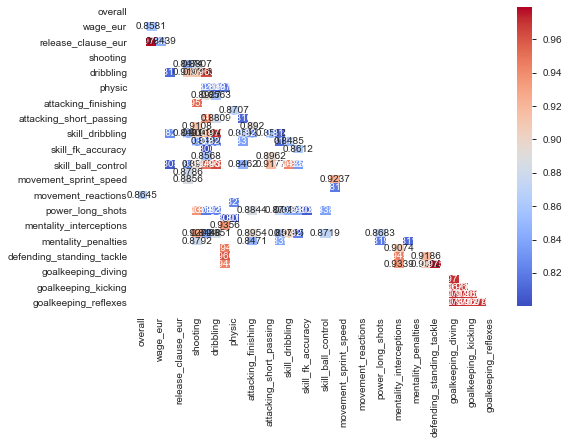

In [53]:
corr = fifa_reqd_data_enc_scaled.corr()

kot = corr[(corr>=.8) & (corr<1)]
kot.dropna(axis=0, how='all', inplace = True)
kot.dropna(axis=1, how='all', inplace = True)
#plt.figure(figsize=(12,8))
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', linewidths=3, linecolor='black')

matrix = np.triu(kot)
sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', mask = matrix)

In [56]:
kot.to_csv('Correlation.csv')

In [57]:
corr_matrix = fifa_reqd_data_enc_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

to_drop

['wage_eur',
 'release_clause_eur',
 'passing',
 'dribbling',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'power_stamina',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_penalties',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [59]:
fifa_reqd_data_no_corr = fifa_reqd_data_enc_scaled.drop(columns=to_drop, axis=1)

In [60]:
fifa_reqd_data_no_corr.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'defending', 'movement_balance', 'power_shot_power', 'power_jumping',
       'power_strength', 'mentality_vision', 'mentality_composure',
       'nationality_enc', 'club_enc', 'player_positions_enc',
       'preferred_foot_enc', 'work_rate_enc', 'body_type_enc', 'real_face_enc',
       'team_position_enc'],
      dtype='object')

In [68]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(fifa_reqd_data_no_corr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
# inertia on the fitted data
kmeans.inertia_

21407.2889744838

Text(0, 0.5, 'Inertia')

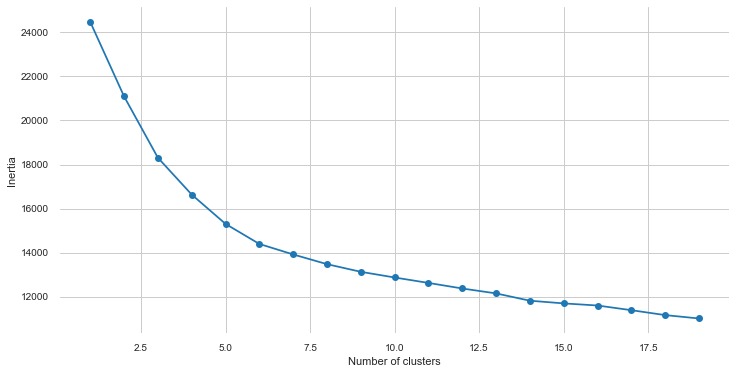

In [70]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(fifa_reqd_data_no_corr)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [71]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(fifa_reqd_data_no_corr)
pred = kmeans.predict(fifa_reqd_data_no_corr)

In [72]:
frame = pd.DataFrame(fifa_reqd_data_no_corr)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    4984
3    3651
1    2979
2    2849
0    2037
4    1778
Name: cluster, dtype: int64